Gianfranco Polar // 20200841

# Reporte 10

## Lectura

1. ¿Cuál es la pregunta de investigación del artículo?

2. ¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?

3. ¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? (Si no puede encontrar ninguna contribución, pregúntese por qué el editor y los árbitros decidieron publicar el artículo).

4. ¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros artículos relacionados)


El artículo ‘Who becomes an inventor in America? The importance of exposure to innovation’ busca responder cuáles son los factores que determinan las brechas de innovación y las características adquiridas al nacer, que a su vez determinan quien puede convertirse en inventor. Para ello, toma factores sociales como el grupo racial, el género y el nivel socioeconómico. El enfoque utilizado por la investigación tiene varias fortalezas, entre ellas su valoración de factores sociales y culturales, como la exposición a la innovación. Por otro lado, su principal desventaja es que sólo toma factores estructurales para lograr responder a la pregunta de investigación, mas no toma en cuenta factores individuales como el entorno familiar, el coeficiente intelectual, el desempeño académico del estudiante.

El artículo aporta positivamente a la pregunta de investigación ya que confirma que las disparidades del sistema hacia personas racializadas, mujeres o personas de bajos ingresos, son aquellas que crean las brechas que determinan quién puede ser un inventor en los Estados Unidos. Un siguiente paso en la investigación sería analizar las políticas públicas emprendidas por los gobiernos nacional, estatales y locales para reducir esta brecha e incorporar a toda la población a las oportunidades de desenvolverse como inventores.

## Código

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

#### REGRESIÓN DISCONTINUA

* Explique de manera muy breve y resumida en qué consiste una regresión discontinua.

Una regresión discontinua es un diseño cuasi-experimental en el que se “regresa” a encontrar las variables causales de una variable dependiente. Así, una regresión discontinua sirve para analizar “saltos artificiales” o eventos en los que se quiere explorar las posibles causas de los mismos.

* Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.

La regresión discontinua apicado a la vida real puede encontrar la causalidad de una variable. En este sentido, un ejemplo de la vida real sería el uso de fármacos y la prueba de su eficacia o de sus consecuencias, para esto se pondrán dos grupos en los que el grupo (A) consumirá la pastilla y el grupo (B) no lo hará. De esta manera se determinará los posibles efectos de la pastilla.

* Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).

El Sharp Design es utilizado cuando en la regresión discontinua hay un corte discreto: una separación entre grupos para medir los promedios y así obtener el efecto.

#### APLICACIÓN

1. Ahora guíese del siguiente script visto en clase.

- Siguiendo todo el apartado Simulated Data, trabaje con la siguiente ecuación, según sea su caso, y replique los resultados correspondientes, incluidos los gráficos respectivos.




EJEMPLO 1 : Y = 15 + 22D + 2.5X + ϵ      

        - Realice un gráfico similar

In [4]:
## Random data
dat = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat.loc[dat.x<0, 'x'] = 0
dat = dat[dat.x<100]
dat['D'] = 0
# Cutoff
dat.loc[dat.x>50, 'D'] = 1
# Simulated Y
dat['y'] = 15 + 22*dat.D + 2.5 * dat.x + np.random.normal(0, 20, dat.shape[0])
# Not Treatment
dat_0 = dat[dat.D == 0]
# Treatment
dat_1 = dat[dat.D == 1]

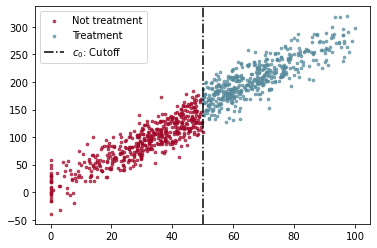

In [5]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [6]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y0 = y_hat_lin(dat_0)
data_y1 = y_hat_lin(dat_1)

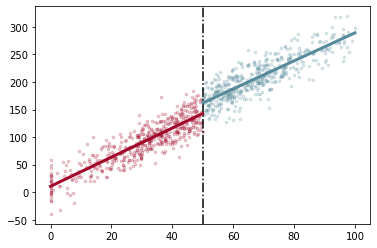

In [7]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3);


        - Encontrar the Jump Effect y plotearlo.

In [8]:
eff = min(data_y1.yhat) - max(data_y0.yhat)
eff = round(eff,  2)
print("Effect:", f"{eff}")

Effect: 19.57


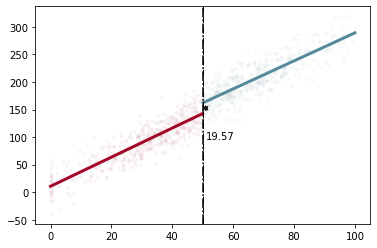

In [9]:
plt.scatter("x", "y", data = dat_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(data_y0.yhat)), xytext = (51, min(data_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));


EJEMPLO 2 : Y = 12 + 60D + 1.3X + ϵ
   

        - Realice un gráfico similar

In [10]:
## Random data
dat2 = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
dat2.loc[dat2.x<0, 'x'] = 0
dat2 = dat2[dat2.x<100]
dat2['D'] = 0
# Cutoff
dat2.loc[dat2.x>50, 'D'] = 1
# Simulated Y
dat2['y'] = 12 + 60*dat2.D + 1.3 * dat2.x + np.random.normal(0, 20, dat2.shape[0])
# Not Treatment
dat2_0 = dat2[dat2.D == 0]
# Treatment
dat2_1 = dat2[dat2.D == 1]

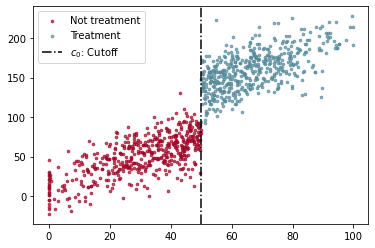

In [11]:
# Colors 
treat_c = "#568A9B" # Treatment
n_treat = "#A10728" # Not treatment
# Plot
plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [12]:
def y_hat_lin(da_ta, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = da_ta).fit().predict()
    da_ta["yhat"] = yhat
    da_ta.sort_values('yhat', inplace = True)
    return da_ta

data_y02 = y_hat_lin(dat2_0)
data_y12 = y_hat_lin(dat2_1)

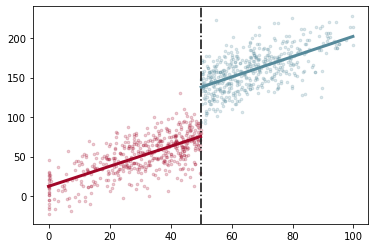

In [13]:
plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y02, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y12, color = treat_c, lw = 3);

        - Encontrar the Jump Effect y plotearlo.

In [14]:
eff2 = min(data_y12.yhat) - max(data_y02.yhat)
eff2 = round(eff2,  2)
print("Effect:", f"{eff2}")

Effect: 62.47


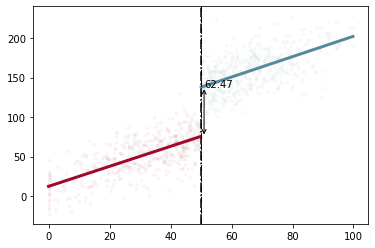

In [15]:
plt.scatter("x", "y", data = dat2_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = dat2_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = data_y02, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = data_y12, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{eff2}", xy = (51, eff2 + 76))
plt.annotate("", xy = (51, max(data_y02.yhat)), xytext = (51, min(data_y12.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));